In [1]:
import tensorflow as tf 

In [2]:
mnist = tf.keras.datasets.mnist


In [3]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data() 

11493376/11490434 [==============================] - 3s 0us/step


In [4]:
import numpy as np 
print(np.size(xtrain))

47040000


In [5]:
print(type(xtrain))

<class 'numpy.ndarray'>


In [6]:
xtrain.head() 

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [7]:
xtrain.shape

(60000, 28, 28)

In [8]:
ytrain.shape

(60000,)

In [9]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [11]:
print(xtrain[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

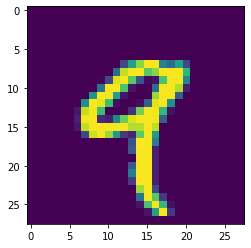

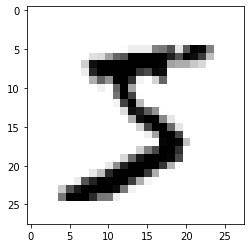

In [17]:
plt.imshow(xtrain[4])
plt.show()
plt.imshow(xtrain[0],cmap = plt.cm.binary)

In [14]:
ytrain[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

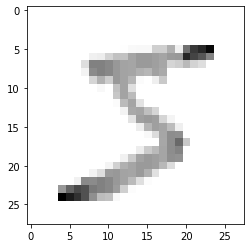

In [18]:
xtrain = tf.keras.utils.normalize(xtrain,axis = 1)
xtest =  tf.keras.utils.normalize(xtest,axis = 1)
plt.imshow(xtrain[0],cmap = plt.cm.binary)

In [19]:
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# resize image to make it suitable for Convolution operation

In [22]:
IMG_SIZE = 28
xtrainr = np.array(xtrain).reshape(-1,IMG_SIZE, IMG_SIZE,1)
xtestr = np.array(xtest).reshape(-1,IMG_SIZE, IMG_SIZE,1)
print('training sample dimension',xtrainr.shape)
print('testing sample dimension',xtestr.shape)

training sample dimension (60000, 28, 28, 1)
testing sample dimension (10000, 28, 28, 1)


In [27]:
print(xtrainr.shape[1:4])

(28, 28, 1)


## Creating deep neural network

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D,MaxPooling2D

In [32]:
model = Sequential()

# first convolution layers 
model.add(Conv2D(64,(3,3),input_shape = xtrainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolution Layer 

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# 3rd convolution layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# Fully Connected layer 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

## last fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_12 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_13 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)         

In [34]:
print("total training sample", len(xtrainr))

total training sample 60000


In [35]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model.fit(xtrainr,ytrain,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 120s 90ms/step - loss: 0.3492 - accuracy: 0.8907 - val_loss: 0.1176 - val_accuracy: 0.9638
Epoch 2/5
1313/1313 [==============================] - 114s 87ms/step - loss: 0.1091 - accuracy: 0.9666 - val_loss: 0.0956 - val_accuracy: 0.9709
Epoch 3/5
1313/1313 [==============================] - 117s 89ms/step - loss: 0.0785 - accuracy: 0.9756 - val_loss: 0.0774 - val_accuracy: 0.9755
Epoch 4/5
1313/1313 [==============================] - 123s 94ms/step - loss: 0.0605 - accuracy: 0.9811 - val_loss: 0.0772 - val_accuracy: 0.9772
Epoch 5/5
1313/1313 [==============================] - 128s 98ms/step - loss: 0.0496 - accuracy: 0.9846 - val_loss: 0.0785 - val_accuracy: 0.9762


In [37]:
predictions = model.predict([xtestr])

In [38]:
print(predictions)

[[2.4460194e-09 1.9404324e-07 5.2349878e-07 ... 9.9999821e-01
  5.6274514e-09 3.9100289e-07]
 [1.9892022e-07 2.3924145e-05 9.9995303e-01 ... 5.2622977e-06
  6.3414625e-08 1.1464056e-08]
 [4.1503947e-07 9.9953067e-01 6.3492298e-05 ... 2.6195057e-04
  1.2980726e-05 1.3321641e-06]
 ...
 [1.5122172e-10 6.0789056e-08 4.9304383e-09 ... 6.1821447e-07
  1.0381214e-06 3.2414388e-05]
 [1.4637302e-06 4.2308108e-09 4.5023796e-08 ... 3.0384200e-08
  9.9627568e-06 6.0494608e-07]
 [1.0450626e-04 3.2648335e-05 2.3967028e-04 ... 3.5366000e-05
  2.1693981e-05 3.2091677e-06]]


In [42]:
print(np.argmax(predictions[0]))

7


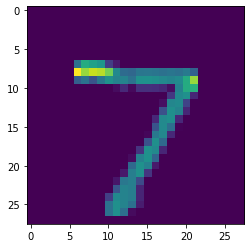

In [43]:
plt.imshow(xtest[0])

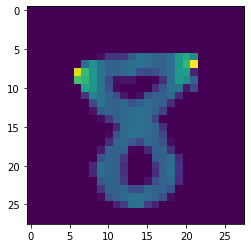

In [44]:
plt.imshow(xtest[128])